In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
df =pd.read_csv('tripadvisor_hotel_reviews.csv')

In [3]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
df.info

<bound method DataFrame.info of                                                   Review  Rating
0      nice hotel expensive parking got good deal sta...       4
1      ok nothing special charge diamond member hilto...       2
2      nice rooms not 4* experience hotel monaco seat...       3
3      unique, great stay, wonderful time hotel monac...       5
4      great stay great stay, went seahawk game aweso...       5
...                                                  ...     ...
20486  best kept secret 3rd time staying charm, not 5...       5
20487  great location price view hotel great quick pl...       4
20488  ok just looks nice modern outside, desk staff ...       2
20489  hotel theft ruined vacation hotel opened sept ...       1
20490  people talking, ca n't believe excellent ratin...       2

[20491 rows x 2 columns]>

In [5]:
def ratings(rating):
    if rating>3 and rating<=5:
        return "positive"
    if rating>0 and rating<=3:
        return "negative"
        

In [6]:
df['Ratings']=df['Rating'].apply(ratings)

TypeError: object of type 'builtin_function_or_method' has no len()

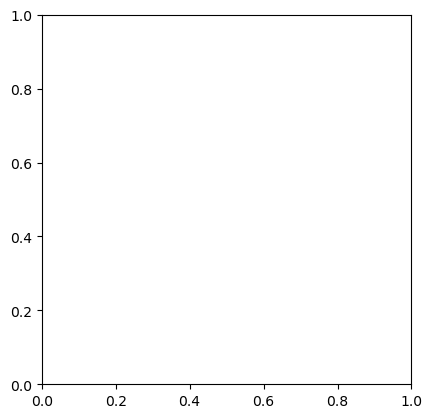

In [7]:
plt.pie(df['Rating'].value_counts(),
        labels=df['Rating'].unique().tolist,
        autopct='%1.1f%%')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing 'Rating' column

# Get the counts of each unique rating
rating_counts = df['Rating'].value_counts()

# Get the unique ratings as labels
rating_labels = df['Rating'].unique().tolist()

# Plotting the pie chart
plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%')
plt.show()


In [ ]:
length = len(df['Review'][0])
print(f'Length of a sample review:{length}')


In [ ]:
df['Length'] = df['Review'].str.len()
df.head()

In [ ]:
word_count=df['Review'] [0].split()
print(f'Word count in sample review:{len(word_count)}')


In [ ]:
def word_count(review):
    review_list=review.split()
    return len(review_list)

In [ ]:
df['Word_count'] = df['Review'].apply(word_count)
df.head()

In [ ]:
df['mean_word_length'] = df['Review'].map(lambda rev: np.mean([len(word) 
                                                               for word in rev.split()]))
df.head()

In [ ]:
import nltk
nltk.download('punkt')

from nltk import tokenize 
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])


In [ ]:
from nltk import tokenize
import numpy as np

# Tokenize sentences in English explicitly
sentences = tokenize.sent_tokenize(df['Review'][0], language='english')
mean_length = np.mean([len(sent) for sent in sentences])
print(mean_length)


In [ ]:
import nltk
nltk.download('punkt')



In [ ]:
import nltk
nltk.download('punkt')


In [ ]:
import nltk.data
print(nltk.data.find('tokenizers/punkt/english.pickle'))


In [ ]:
nltk.data.path.append('C:\\Users\\madhu\\nltk_data')


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


In [ ]:
pip install --upgrade nltk


In [ ]:
features =df.columns.tolist()[2:]
df=df.drop(features,axis=1)
df.head()

In [ ]:
df.info()


In [ ]:
import re
from nltk.corpus import stopwords
def clean(review):
    review=review.lower()
    review=re.sub('[^a-z A-Z 0-9-]+','',review)
    review=" ".join([word for word in review.split() if word not in stopwords.words('english')])
    return review

In [ ]:
df ['Review'] =df['Review'].apply(clean)
df.head()

In [ ]:
def corpus(text):
    text_list=text.split()
    return text_list
    

In [ ]:
df['Review_lists'] =df['Review'].apply(corpus)
df.head()

In [ ]:
from tqdm import trange
corpus =[]
for i in trange(df.shape[0],ncols=150,nrows=10,colour='green',smoothing=0.8):
    corpus+=df['Review_lists'][i]
len(corpus)

In [ ]:
from collections import Counter 
mostCommon =Counter(corpus).most_common(10)
mostCommon

In [ ]:
words=[]
freq=[]
for word,count in mostCommon[:3]:
    words.append(word)
    freq.append(count)

In [ ]:
print(words)
print(freq)

In [ ]:
import seaborn as sns
sns.barplot(x=freq,y=words)
plt.title('Top 10 Moat Frequently Occuring Words')
plt.show()

#28 jan 25

###cosine similaritys

In [ ]:
doc_trump="Mr.Trump became presidient after winning  the political election 


doc_election="President Trump says putin had no political interface is 
He says it was a witchhunt by political parties.
He clamed President putin is a friend who had nothing to do with the 

doc_putin ="Post elections,Vladimir Putin became President of Russia.
President Putin had served as the Prime Minister earlier in his politi

In [ ]:
doc_trump="Mr. Trump became president after winning the political election. Through he lost the support of some republican friends, Trump is friends with President putin"
doc_election = "President Trump says Putin had no polictical interference is the election outcome. He says it was a witchhunt by political parties.He claimed President Putin is a friend who had nothinng to do with the election"
doc_putin = "Post elections, Vladimir Putin became President of Russia. president Putin had served as the Prime Minister earlier in his political career"
documents = [doc_trump, doc_election, doc_putin]

In [ ]:
documents

In [ ]:
from sklearn.feature_extraction.text import CountVectorize
import pandas as pd 
count_vect =CountVectorize(stop_words='english')
sparese_matrix =count_vect.fit_transform(documents)
doc_term_matrix =sparse_matrix.toden

In [ ]:
from sklearn.metrics.pairwise import cosine_similary

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
A=np.array([7,3])
B=np.array([3,7])
ax=plt.axes()
ax.arrow(0.0,0.0,A[0],A[1],head_width=0.4,head_length=0.5)
plt.annotate(f"A({A[0]},{A[1]})",xy=(A[0],A[1]),xytext=(A[0]+0/5,A[1]))
ax.arrow(0.0,0.0,B[0],B[1],head_width=0.4,head_length=0.5)
plt.annotate(f"B({B[0]},{B[1]})",xy=(B[0],B[1]),xytext=(B[0]+0/5,B[1]))
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
plt.close()
cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
print(f"cosine similarity between A and B:{cos_sim}")
print(f"Cosine Distance beteen A and B:{1-cos_sim}")


### 29 jan 2025


In [ ]:
#text similarity

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
responses=[
    "You can return an item within 7days of purchase.",
    "Our return policy allows you to return items that are unopened and in their original condition.",
    "We offer free shipping on order over $50",
    "To track your order ,you can visit the 'Order Tracking' page and enter your order number.",
    "Our customer "]


In [ ]:
user_input ="How can Itrack my order?"
vectorizer =TfidfVectorizer(stop_words='english')
all_texts=responses+[user_input]


In [ ]:
tfidf_matrix=vectorizer.fit_transform(all_texts)

In [ ]:
user_vector = tfidf_matrix[-1]
response_vectors = tfidf_matrix[:-1]
cosine_similarities = cosine_similarity(user_vector, response_vectors)

In [ ]:
most_similar_idx=np.argmax(cosine_similarities )

In [ ]:
print(f"User Query:{user_input}")
print(f"Most revelent reponse: {responses[most_similar_idx]}")


### import all libraries


In [ ]:
import io
import random
import string
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk

In [ ]:
import nltk
nltk.download('punkt')

In [ ]:
nltk.download("popular",quiet=True)
nltk.download("punkt")
nltk.download("wordnet")

In [ ]:
import nltk

nltk.download('punkt')

In [ ]:
f=open('input.txt','r',errors='ignore')
raw = f.read()
raw = raw.lower()

### 30 jan 25

In [ ]:
import nltk
sent_tokens=nltk.sent_tokenize(raw)
word_tokens=nltk.word_tokenize(raw)

In [ ]:
lemmer=nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in token

In [ ]:
GREETING_INPUTS=("hello","hi","greetings","what's up","hey",\"how are you?")
GREETING_RESPONSES=["hi","hey","hi there ","hello",\
                    "I am glad! You are talking to me ",\
                     "I am fine! How about you?"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETINGS_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [ ]:
def response(user_response):
    robo_response=''
    sent-tokens.append(user_response)
    

In [ ]:
flag=True
print("SABot:My  name is ")
if(user_response=='thanks' or user_response=='thank you'):
    if(user_response!='bye'):
        if(user_response.lower()
           if(user_response=='thanks' or user_response=='thankyou'):

                      flage =False
                      print("sabot:you are welcome..")
    else:
        if(greeting(user_response)!=None):
            print("SABOT :"+greeting(user_response))
            